In [31]:
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Average, Dropout
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import Adam
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train / 255.
x_test = x_test / 255.
encoded_y_train = to_categorical(y_train, num_classes=10)

In [4]:
shape = 'x_train shape: {} | encoded_y_train shape: {}\n'
shape += 'x_test shape : {} | y_test shape : {}'
print(shape.format(x_train.shape, encoded_y_train.shape, x_test.shape, y_test.shape))

x_train shape: (60000, 28, 28) | encoded_y_train shape: (60000, 10)
x_test shape : (10000, 28, 28) | y_test shape : (10000,)


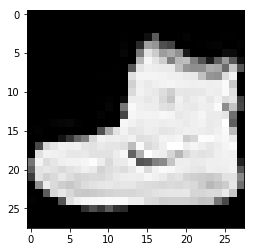

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [5]:
plt.imshow(x_train[0,:,:],cmap='Greys_r')
plt.show()
print(y_train[0])
print(encoded_y_train[0])

In [10]:
def compile_and_train(model, num_epochs): 
    model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['acc']) 
    filepath = 'weights/' + model.name + '.{epoch:02d}-{loss:.2f}.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, save_weights_only=True, save_best_only=True, mode='auto', period=1)
    tensor_board = TensorBoard(log_dir='logs/', histogram_freq=0, batch_size=32)
    history = model.fit(x=x_train, y=encoded_y_train, batch_size=32, epochs=num_epochs, verbose=1, callbacks=[checkpoint, tensor_board], validation_split=0.2)
    return history

In [44]:
x_train = x_train.reshape(60000,28,28,1)
input_shape = x_train[0,:,:,:].shape # 28 by 28
print(x_train.shape)
model_input = Input(shape=input_shape)

(60000, 28, 28, 1)


In [45]:
def first_cnn(model_input):
    
    x = Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same')(model_input)
    x = MaxPooling2D(pool_size=(3, 3), strides = 2)(x)
    x = Conv2D(192, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides = 2)(x)
    x = Conv2D(192, (3, 3), activation='relu', padding = 'same')(x)
    x = Conv2D(10, (1, 1))(x)
    x = GlobalAveragePooling2D()(x)
    x = Activation(activation='softmax')(x)
    
    model = Model(model_input, x, name='first_cnn')
    
    return model

In [46]:
first_model = first_cnn(model_input)

In [19]:
_ = compile_and_train(first_model, num_epochs=5)

ValueError: Error when checking input: expected input_2 to have 4 dimensions, but got array with shape (60000, 28, 28)